In [ ]:
2import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. Load Data
data = pd.read_csv("Apple.csv")
data = data[['Close']]
print(data.head())

# 2. Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 60
X, y = create_sequences(scaled_data, SEQ_LEN)

# 4. Split train/test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6. Train
model.fit(X_train, y_train, epochs=20, batch_size=32)

# 7. Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
real = scaler.inverse_transform(y_test)

# 8. Plot
plt.figure(figsize=(12, 6))
plt.plot(real, label="Real")
plt.plot(predicted, label="Predicted")
plt.title("Apple Stock Price Prediction (RNN)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


      Close
0  0.128348
1  0.121652
2  0.112723
3  0.115513
4  0.118862
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.4849e-04
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 5.9363e-07
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 7.0335e-07
Epoch 4/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 6.1412e-07
Epoch 5/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 6.3431e-07
Epoch 6/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 5.8817e-07
Epoch 7/20
 86/260 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.0003e-07

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


In [ ]:
# Load the data (replace 'your_data.csv' with the path to your CSV file)
data = pd.read_csv('Apple.csv', parse_dates=True, index_col='Date')

# Use the 'Close' price for prediction
close_prices = data['Close'].values

# Reshape data into a 2D array (n_samples, n_features)
close_prices = close_prices.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)


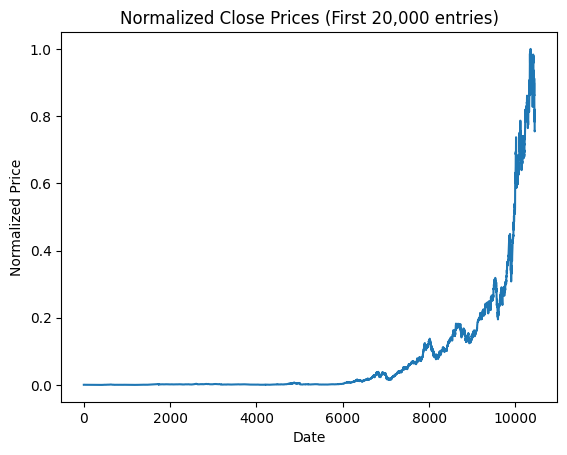

In [ ]:
# Extract the 'Close' column for the first 20,000 entries
close_prices = data['Close'][:20000].values  # This gets the first 20,000 entries of the 'close' column

# Reshape the data to be 2D, which is required by the MinMaxScaler
close_prices = close_prices.reshape(-1, 1)

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

# Visualize the normalized data (optional)
plt.plot(scaled_close_prices)
plt.title('Normalized Close Prices (First 20,000 entries)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.show()


In [ ]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])  # Use 'time_step' number of previous days for prediction
        y.append(data[i + time_step, 0])      # The value after 'time_step' days is the target
    return np.array(X), np.array(y)

# Create dataset with a time step of 60 days
X, y = create_dataset(scaled_close_prices, time_step=60)

# Reshape X to be 3D as required by LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Build the LSTM model
model = Sequential()

# First LSTM layer with Dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected output layer
model.add(Dense(units=1))  # Output layer with 1 neuron (for predicting the next day's price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initialize the RNN model
model = Sequential()

# Add LSTM layer with 50 units and input shape corresponding to the time steps and features
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=False))

# Add a Dense layer for the output (predicted stock price)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 1.0094e-04 - val_loss: 0.0024
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 2.9431e-06 - val_loss: 0.0017
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 2.4268e-06 - val_loss: 0.0019
Epoch 4/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 2.2670e-06 - val_loss: 0.0014
Epoch 5/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - loss: 2.2199e-06 - val_loss: 0.0023
Epoch 6/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - loss: 2.0481e-06 - val_loss: 4.1482e-04
Epoch 7/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 2.6268e-06 - val_loss: 0.0015
Epoch 8/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 1.7482e-06 - val_loss: 9.7039e-04
Epoch 9/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - loss: 1.7830e-06 - val_loss: 9.5196e-04
Epoch 10/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - loss: 1.7243e-06 - val_loss: 0.0014
Epoch 11/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 1.63

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


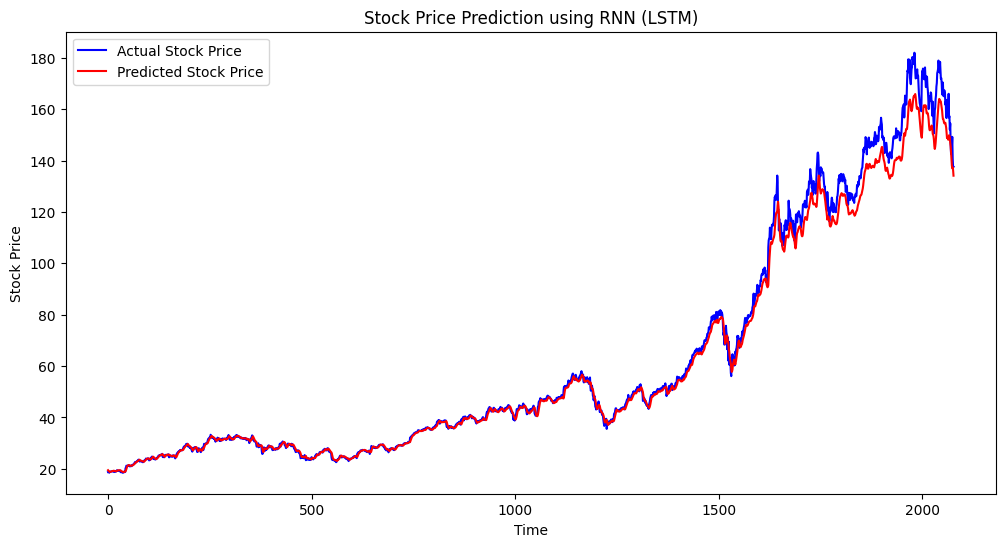

In [ ]:
# Predict stock prices on the test set
predicted_stock_price = model.predict(X_test)

# Inverse transform the predictions and actual values to get actual prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predicted vs actual stock prices
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction using RNN (LSTM)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
